In [1]:
import pandas as pd
import numpy as np

In [ ]:
#asd

In [2]:
train = pd.read_csv("C:/Users/삼성/OneDrive - 계명대학교/바탕 화면/날씨빅콘/날씨 데이터셋/ele_tr.csv")
test = pd.read_csv("C:/Users/삼성/OneDrive - 계명대학교/바탕 화면/날씨빅콘/날씨 데이터셋/ele_te.csv")

In [3]:
train.rename(columns={'electric_train.num': '격자넘버'}, inplace=True)
train.rename(columns={'electric_train.tm': '날짜'}, inplace=True)
train.rename(columns={'electric_train.hh24': '시간'}, inplace=True)
train.rename(columns={'electric_train.n': '공동주택수'}, inplace=True)
train.rename(columns={'electric_train.stn': '지점번호'}, inplace=True)
train.rename(columns={'electric_train.sum_qctr': '계약전력합계'}, inplace=True)
train.rename(columns={'electric_train.sum_load': '전력수요합계'}, inplace=True)
train.rename(columns={'electric_train.n_mean_load': '전력부하량평균'}, inplace=True)
train.rename(columns={'electric_train.nph_ta': '기온'}, inplace=True)
train.rename(columns={'electric_train.nph_hm': '상대습도'}, inplace=True)
train.rename(columns={'electric_train.nph_ws_10m': '풍속'}, inplace=True)
train.rename(columns={'electric_train.nph_rn_60m': '강수량'}, inplace=True)
train.rename(columns={'electric_train.nph_ta_chi': '체감온도'}, inplace=True)
train.rename(columns={'electric_train.weekday': '요일'}, inplace=True)
train.rename(columns={'electric_train.week_name': '주중주말'}, inplace=True)
train.rename(columns={'electric_train.elec':'전력기상지수'}, inplace=True)

In [4]:
test.rename(columns={'electric_test.num': '격자넘버'}, inplace=True)
test.rename(columns={'electric_test.tm': '날짜'}, inplace=True)
test.rename(columns={'electric_test.hh24': '시간'}, inplace=True)
test.rename(columns={'electric_test.stn': '지점번호'}, inplace=True)
test.rename(columns={'electric_test.nph_ta': '기온'}, inplace=True)
test.rename(columns={'electric_test.nph_hm': '상대습도'}, inplace=True)
test.rename(columns={'electric_test.nph_ws_10m': '풍속'}, inplace=True)
test.rename(columns={'electric_test.nph_rn_60m': '강수량'}, inplace=True)
test.rename(columns={'electric_test.nph_ta_chi': '체감온도'}, inplace=True)
test.rename(columns={'electric_test.weekday': '요일'}, inplace=True)
test.rename(columns={'electric_test.week_name': '주중주말'}, inplace=True)

In [5]:
train.isnull().sum()

Unnamed: 0    0
격자넘버          0
날짜            0
시간            0
공동주택수         0
지점번호          0
계약전력합계        0
전력수요합계        0
전력부하량평균       0
기온            0
상대습도          0
풍속            0
강수량           0
체감온도          0
요일            0
주중주말          0
전력기상지수        0
dtype: int64

In [6]:
(train == -99).sum()

Unnamed: 0      0
격자넘버            0
날짜              0
시간              0
공동주택수           0
지점번호            0
계약전력합계          0
전력수요합계          0
전력부하량평균         0
기온              0
상대습도            0
풍속            169
강수량             0
체감온도            0
요일              0
주중주말            0
전력기상지수          5
dtype: int64

In [7]:
(test == -99).sum()

Unnamed: 0     0
격자넘버           0
날짜             0
시간             0
지점번호           0
기온             0
상대습도           0
풍속            32
강수량           92
체감온도           0
요일             0
주중주말           0
dtype: int64

In [8]:
# test -99 행만 추출
# -99 값을 포함하는 행을 추출
test[test.isin([-99]).any(axis=1)]

,Unnamed: 0,격자넘버,날짜,시간,지점번호,기온,상대습도,풍속,강수량,체감온도,요일,주중주말
693,694,2385,2023-01-29 22:00:00,22,303,7.3,54.0,-99.0,0.0,7.3,6,1
2565,2566,2385,2023-04-17 22:00:00,22,303,15.8,70.0,24.6,-99.0,15.8,0,0
2566,2567,2385,2023-04-17 23:00:00,23,303,16.0,73.9,24.3,-99.0,16.0,0,0
2567,2568,2385,2023-04-18 00:00:00,24,303,16.2,79.1,23.8,-99.0,16.2,1,0
3029,3030,2385,2023-05-07 06:00:00,6,303,13.5,93.4,-99.0,-99.0,16.1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8155,8156,2385,2023-12-06 20:00:00,20,303,11.8,65.9,16.9,-99.0,11.8,2,0
8156,8157,2385,2023-12-06 21:00:00,21,303,11.6,58.5,17.2,-99.0,11.6,2,0
8157,8158,2385,2023-12-06 22:00:00,22,303,11.7,63.9,14.8,-99.0,11.7,2,0
8158,8159,2385,2023-12-06 23:00:00,23,303,11.4,60.8,15.1,-99.0,11.4,2,0


In [9]:
# -99 제거 전
print(train.shape)
print(test.shape)

(7593355, 17)
(2838239, 12)


#### -99 값 제거

In [10]:
# -99 값을 포함하는 행을 제거
train_cleaned = train[~train.isin([-99]).any(axis=1)]

In [11]:
(train_cleaned == -99).sum()

Unnamed: 0    0
격자넘버          0
날짜            0
시간            0
공동주택수         0
지점번호          0
계약전력합계        0
전력수요합계        0
전력부하량평균       0
기온            0
상대습도          0
풍속            0
강수량           0
체감온도          0
요일            0
주중주말          0
전력기상지수        0
dtype: int64

In [12]:
# test
test_cleaned = test[~test.isin([-99]).any(axis=1)]

In [13]:
(test_cleaned == -99).sum()

Unnamed: 0    0
격자넘버          0
날짜            0
시간            0
지점번호          0
기온            0
상대습도          0
풍속            0
강수량           0
체감온도          0
요일            0
주중주말          0
dtype: int64

In [15]:
# -99 제거 후
print(train_cleaned.shape) # 174
print(test_cleaned.shape) # 96

(7593181, 17)
(2838143, 12)


#### 데이터 EDA

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7593181 entries, 0 to 7593354
Data columns (total 17 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   격자넘버        int64  
 2   날짜          object 
 3   시간          int64  
 4   공동주택수       int64  
 5   지점번호        int64  
 6   계약전력합계      int64  
 7   전력수요합계      float64
 8   전력부하량평균     float64
 9   기온          float64
 10  상대습도        float64
 11  풍속          float64
 12  강수량         float64
 13  체감온도        float64
 14  요일          int64  
 15  주중주말        int64  
 16  전력기상지수      float64
dtypes: float64(8), int64(8), object(1)
memory usage: 1.0+ GB


In [18]:
# 나눔 글꼴을 지정하기 위해 matplotlib의 rc 설정을 사용
# 경로에 있는 글꼴을 지정합니다. 글꼴 파일의 경로를 올바르게 지정해야 합니다.
import matplotlib.font_manager as fm
nanum_gothic_font_path = 'C:/WINDOWS/Fonts/NGULIM.TTF'
font_name = fm.FontProperties(fname=nanum_gothic_font_path).get_name()
plt.rc('font', family = font_name)

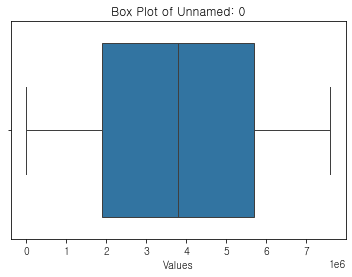

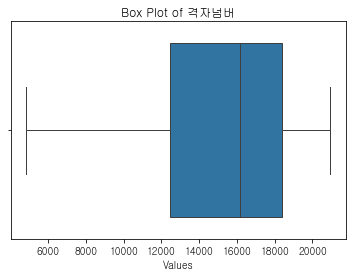

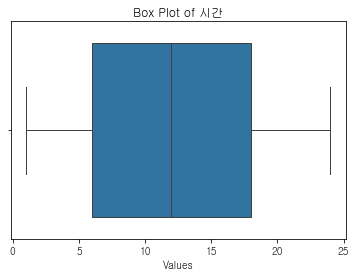

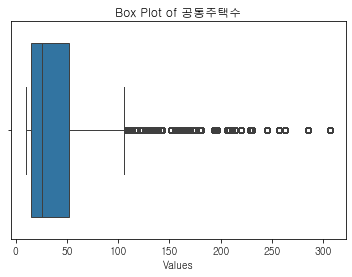

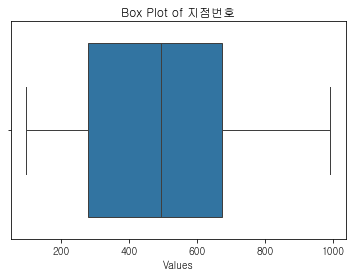

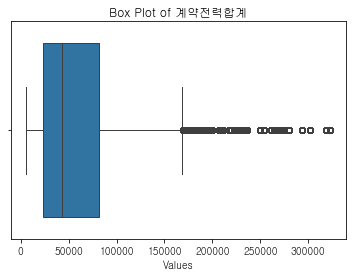

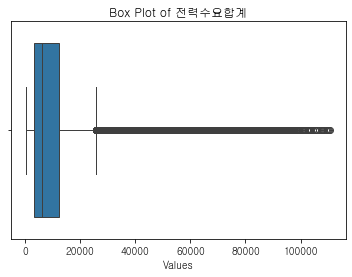

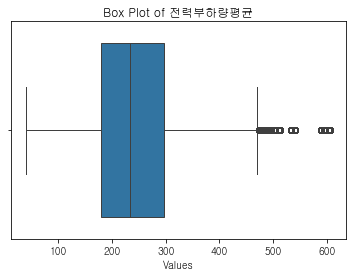

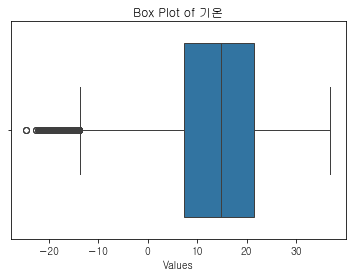

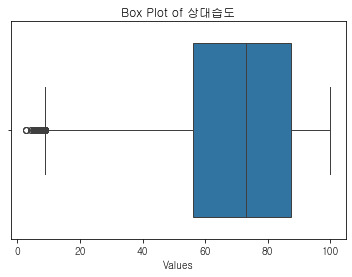

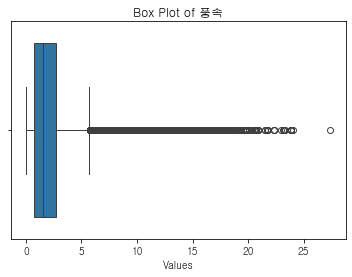

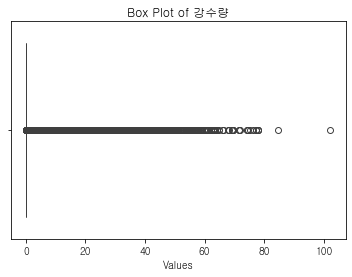

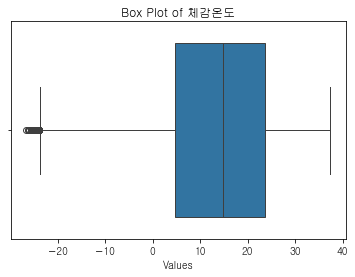

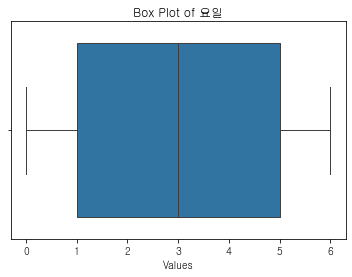

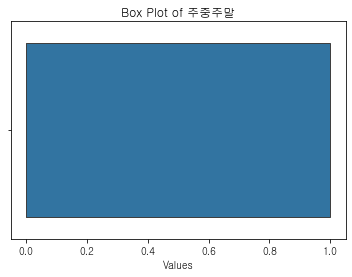

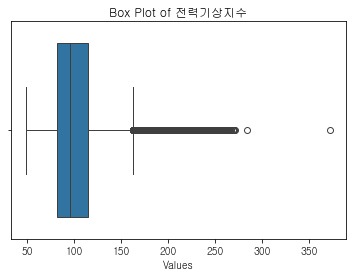

In [19]:
# 각 열별로 박스플롯 그리기
for column in train_cleaned.columns:
    if train_cleaned[column].dtype in ['int64', 'float64']:  # 숫자형 열만 선택
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=train_cleaned[column])
        plt.title(f'Box Plot of {column}')
        plt.xlabel('Values')
        plt.show()

In [22]:
def detect_outliers_iqr(df, columns=None):
    if columns is None:
        columns = df.columns
    outliers = {}
    outlier_ratios = {}
    for column in columns:
        if column in df.columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
            outlier_count = len(outliers[column])
            total_count = len(df[column])
            outlier_ratio = outlier_count / total_count
            outlier_ratios[column] = outlier_ratio
    return outliers, outlier_ratios

In [23]:
# 특정 열을 지정하여 함수 호출
columns_to_check = ['계약전력합계', '전력수요합계', '전력부하량평균', '기온', '상대습도', '풍속', '강수량', '체감온도', '전력기상지수']  # 확인하고 싶은 열을 리스트로 지정
outlier_ratios= detect_outliers_iqr(train_cleaned, columns_to_check)

print("\n이상치 비율:\n", outlier_ratios)


이상치 비율:
 ({'계약전력합계': 640104     172212
640105     172212
640106     172212
640107     172212
640108     172212
            ...  
7032182    190730
7032183    190730
7032184    190730
7032185    190730
7032186    190730
Name: 계약전력합계, Length: 526146, dtype: int64, '전력수요합계': 364699     26646.08
364700     26922.32
364701     26522.96
364723     26858.72
364724     26970.68
             ...   
7335422    26933.80
7335423    26187.52
7335518    27064.20
7335519    27068.16
7335520    26123.08
Name: 전력수요합계, Length: 440913, dtype: float64, '전력부하량평균': 719016     475.794091
719017     475.794091
719018     475.794091
719019     475.794091
719020     475.794091
              ...    
7190006    603.878552
7190007    603.878552
7190008    603.878552
7190009    603.878552
7190010    603.878552
Name: 전력부하량평균, Length: 175340, dtype: float64, '기온': 79082     -13.8
79083     -13.9
79085     -14.0
79086     -13.8
79087     -14.6
           ... 
7584454   -14.8
7584455   -14.9
7584456   -15.1
7584457   

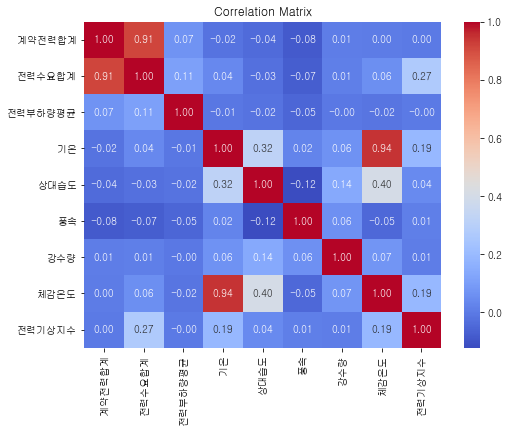

In [24]:
# 상관 행렬 계산
corr = train_cleaned[['계약전력합계', '전력수요합계', '전력부하량평균', '기온', '상대습도', '풍속', '강수량', '체감온도', '전력기상지수']].corr()

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### 계절변수 추가

In [16]:
train = train_cleaned.sort_values(by='날짜')
test = test_cleaned.sort_values(by='날짜')

In [17]:
train['날짜'] = pd.to_datetime(train['날짜'])
test['날짜'] = pd.to_datetime(test['날짜'])

In [18]:
def assign_season(date):
    if (date.month == 2) or (date.month == 3) or (date.month == 4):
        return '봄'
    elif (date.month == 5) or (date.month == 6) or (date.month == 7):
        return '여름'
    elif (date.month == 8) or (date.month == 9) or (date.month == 10):
        return '가을'
    else:
        return '겨울'

# '계절' 컬럼 생성
train['계절'] = train['날짜'].apply(assign_season)
test['계절'] = test['날짜'].apply(assign_season)

In [19]:
train['계절'].value_counts()

계절
겨울    1912127
가을    1912062
여름    1912019
봄     1856973
Name: count, dtype: int64

In [20]:
def assign_date(df, date_column):
    df['년'] = df[date_column].dt.year
    df['월'] = df[date_column].dt.month
    df['일'] = df[date_column].dt.day
    df['시간'] = df[date_column].dt.hour
    return df

train = assign_date(train, '날짜')
test = assign_date(test, '날짜')
train.head(3)

,Unnamed: 0,격자넘버,날짜,시간,공동주택수,지점번호,계약전력합계,전력수요합계,전력부하량평균,기온,...,풍속,강수량,체감온도,요일,주중주말,전력기상지수,계절,년,월,일
4147437,4147438,16914,2020-01-01 01:00:00,1,10,127,15550,2421.96,231.707030,-0.2,...,4.5,0.0,-8.5,2,0,104.53,겨울,2020,1,1
2963662,2963663,14240,2020-01-01 01:00:00,1,12,279,19500,3067.80,258.394386,-1.2,...,2.0,0.0,-8.4,2,0,98.94,겨울,2020,1,1
2902270,2902271,14235,2020-01-01 01:00:00,1,18,822,19674,3204.88,173.613430,-2.3,...,1.1,0.0,-7.4,2,0,102.55,겨울,2020,1,1


In [22]:
test.to_csv("C:/Users/삼성/OneDrive - 계명대학교/바탕 화면/날씨빅콘/날씨 데이터셋/전처리_test.csv")
train.to_csv("C:/Users/삼성/OneDrive - 계명대학교/바탕 화면/날씨빅콘/날씨 데이터셋/전처리_train.csv")